In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install nltk
!pip install sklearn
!pip install seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_set_train = pd.read_csv('twitter_training.csv', on_bad_lines='skip',names=['ID','something','sentiment','tweet'])
data_set_test = pd.read_csv('TASK1_Tweets.csv', on_bad_lines='skip',names=['TWEETS'])

<AxesSubplot:ylabel='count'>

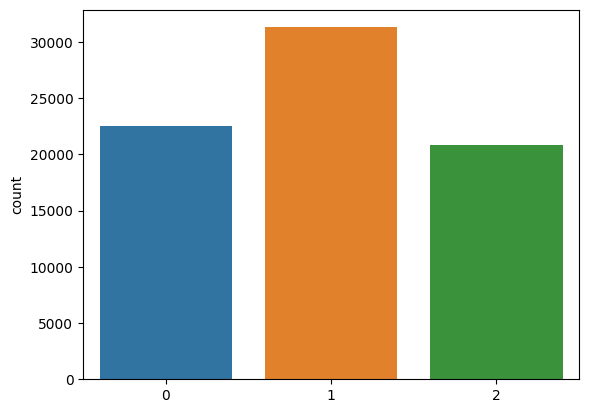

In [3]:
train_repsonses= []
for i in range(0,len(data_set_train['sentiment'])):
    if (data_set_train['sentiment'][i]=='Positive'):
        train_repsonses.append(2)
    elif (data_set_train['sentiment'][i]=='Negative' or data_set_train['sentiment'][i]=='Irrelevent'):
        train_repsonses.append(0)
    else:
        train_repsonses.append(1)
sns.countplot(x=train_repsonses)

In [4]:
X = data_set_train.iloc[:,:4].values
Y = train_repsonses

In [5]:
import re 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PorallaPradhyumna\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
clean_data_TASK = []
for i in range(0,len(data_set_test)):
    
    tweet = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', data_set_test['TWEETS'][i])
    tweet = re.sub("(@[A-Za-z0-9_]+)","", data_set_test['TWEETS'][i])
    tweet = re.sub('[^a-zA-Z]',' ',data_set_test['TWEETS'][i])
    tweet = tweet.lower()
    tweet = tweet.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    tweet = [ps.stem(word) for word in tweet if not word in set(all_stopwords) and len(word)>3]
    tweet = ' '.join(tweet)
    clean_data_TASK.append(tweet)

In [12]:
clean_data_TRAIN = []
for i in range(0,len(data_set_train)):
    tweet = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', data_set_train['tweet'][i])
    tweet = re.sub("(@[A-Za-z0-9_]+)","", data_set_train['tweet'][i])
    tweet = re.sub('[^a-zA-Z]',' ',data_set_train['tweet'][i])
    tweet = tweet.lower()
    tweet = tweet.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    tweet = [ps.stem(word) for word in tweet if not word in set(all_stopwords) and len(word)>3]
    tweet = ' '.join(tweet)
    clean_data_TRAIN.append(tweet)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(clean_data_TRAIN).toarray()

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [14]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [17]:
y_pred = classifier.predict(X_test)


In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[2124  384 1961]
 [1051 1871 3330]
 [ 364  328 3524]]


0.5033808663051483